In [111]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
matplotlib.style.use('ggplot')
%matplotlib inline

In [103]:
from sklearn.decomposition import PCA
from sklearn.cross_validation import cross_val_score as cv_score

def plot_scores(d_scores):
    n_components = np.arange(1,d_scores.size+1)
    plt.plot(n_components, d_scores, 'b', label='PCA scores')
    plt.xlim(n_components[0], n_components[-1])
    plt.xlabel('n components')
    plt.ylabel('cv scores')
    plt.legend(loc='lower right')
    plt.show()
    
def write_answer_1(optimal_d):
    with open("pca_answer1.txt", "w") as fout:
        fout.write(str(optimal_d))
model =[]
scores=[]
for i in range(1,data.shape[1]+1):
    model.append(PCA(n_components=i,svd_solver = 'full'))
    model[i-1].fit(data)
    scores.append(np.mean(cv_score(model[i-1], data)))
scores.index(max(scores))
           
data = pd.read_csv('data_task1.csv')

write_answer_1(scores.index(max(scores))+1)
pass

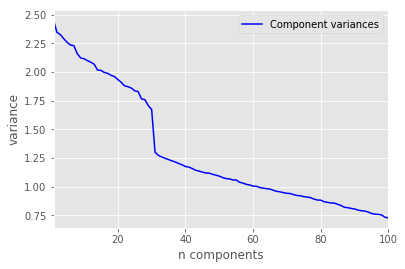

In [104]:
def plot_variances(d_variances):
    n_components = np.arange(1,d_variances.size+1)
    plt.plot(n_components, d_variances, 'b', label='Component variances')
    plt.xlim(n_components[0], n_components[-1])
    plt.xlabel('n components')
    plt.ylabel('variance')
    plt.legend(loc='upper right')
    plt.show()
    
def write_answer_2(optimal_d):
    with open("pca_answer2.txt", "w") as fout:
        fout.write(str(optimal_d))
        
data = pd.read_csv('data_task2.csv')
write_answer_2(30)
# place your code here
pass
plot_variances(varr)

In [84]:
from sklearn.decomposition import PCA
model = PCA(n_components=100,svd_solver = 'full')
model.fit(data)

data_new = model.transform(data)

In [88]:
variance = np.var(data_new, axis = 0)


In [91]:
varr = sorted(variance, reverse = True)

In [102]:
varr=np.array(varr)

In [95]:
diff=0
ind= 0
for i in range(1,len(varr)):
    a = varr[i-1]-varr[i]
    if a >= diff:
        diff = a
        ind = i

In [100]:
print(varr[29],varr[30],varr[31])

(1.6738605522165952, 1.3016983053582207, 1.2737017110430007)


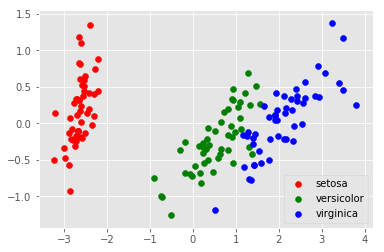

In [34]:
from sklearn import datasets

def plot_iris(transformed_data, target, target_names):
    plt.figure()
    for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
        plt.scatter(transformed_data[target == i, 0],
                    transformed_data[target == i, 1], c=c, label=target_name)
    plt.legend()
    plt.show()
    
def write_answer_3(list_pc1, list_pc2):
    with open("pca_answer3.txt", "w") as fout:
        fout.write(" ".join([str(num) for num in list_pc1]))
        fout.write(" ")
        fout.write(" ".join([str(num) for num in list_pc2]))

# загрузим датасет iris
iris = datasets.load_iris()
data = iris.data
target = iris.target
target_names = iris.target_names
write_answer_3(lst1,lst2)
plot_iris(data_new, target, target_names)

In [17]:
from sklearn.decomposition import PCA
model = PCA( n_components=2, svd_solver = 'full')

In [18]:
model.fit(data)
data_new = model.transform(data)

In [30]:
lst1=[]
lst2=[]
for i in range(4):
    coef_corr1 = np.correlate(data[:,i],data_new[:,0])
    coef_corr2 = np.correlate(data[:,i],data_new[:,1])
    if coef_corr1>=coef_corr2:
        lst1.append(i+1)
    else:
        lst2.append(i+1)
        

In [81]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import RandomizedPCA

def write_answer_4(list_pc):
    with open("pca_answer4.txt", "w") as fout:
        fout.write(" ".join([str(num) for num in list_pc]))
write_answer_4(l)
data = fetch_olivetti_faces(shuffle=True, random_state=0).data
image_shape = (64, 64)

In [23]:
model = RandomizedPCA(n_components = 10)
model.fit(data)

/home/nastya/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


RandomizedPCA(copy=True, iterated_power=2, n_components=10, random_state=None,
       whiten=False)

In [32]:
data_pr = model.transform(data)

In [33]:
d_mean = data_pr.mean(axis=0)
d_mean

array([ -1.14087093e-07,  -1.70968630e-07,  -5.16170536e-07,
         2.43476559e-07,   1.62995184e-07,  -1.26715140e-07,
         4.47732548e-07,   1.45484703e-07,   5.23030061e-08,
         1.33667141e-07])

In [34]:
data_pr = (data_pr - d_mean)

In [68]:
list_cos=[]
for i in range( data_pr.shape[0]):
    cosin=[]
    summ = sum((abs(data_pr[i]))**2)
    for j in range( data_pr.shape[1]):
        cosin.append((abs(data_pr[i][j])**2)/summ)
    list_cos.append(cosin)
    

In [74]:
lst = np.array(list_cos)

10

In [79]:
l=list(lst.argmax(axis=0))

In [109]:
def plot_principal_components(data, model, scatter=True, legend=True):
    W_pca = model.components_
    if scatter:
        plt.scatter(data[:,0], data[:,1])
    plt.plot(data[:,0], -(W_pca[0,0]/W_pca[0,1])*data[:,0], color="c")
    plt.plot(data[:,0], -(W_pca[1,0]/W_pca[1,1])*data[:,0], color="c")
    if legend:
        c_patch = mpatches.Patch(color='c', label='Principal components')
        plt.legend(handles=[c_patch], loc='lower right')
    # сделаем графики красивыми:
    plt.axis('equal')
    limits = [np.minimum(np.amin(data[:,0]), np.amin(data[:,1]))-0.5,
              np.maximum(np.amax(data[:,0]), np.amax(data[:,1]))+0.5]
    plt.xlim(limits[0],limits[1])
    plt.ylim(limits[0],limits[1])
    plt.draw()

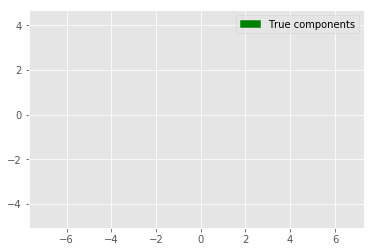

In [114]:
g_patch = mpatches.Patch(color='g', label='True components')
plt.legend(handles=[g_patch])
plt.axis('equal')
limits = [np.minimum(np.amin(data[:,0]), np.amin(data[:,1])),
          np.maximum(np.amax(data[:,0]), np.amax(data[:,1]))]
plt.xlim(limits[0],limits[1])
plt.ylim(limits[0],limits[1])
plt.draw()

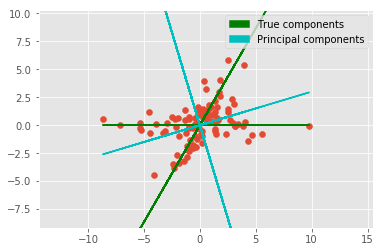

In [115]:
mu = np.zeros(2)
C1 = np.array([[10,0],[0,0.5]])
phi = np.pi/3
C2 = np.dot(C1, np.array([[np.cos(phi), np.sin(phi)],
                          [-np.sin(phi),np.cos(phi)]]))

data = np.vstack([np.random.multivariate_normal(mu, C1, size=50),
                  np.random.multivariate_normal(mu, C2, size=50)])
plt.scatter(data[:,0], data[:,1])
# построим истинные интересующие нас компоненты
plt.plot(data[:,0], np.zeros(data[:,0].size), color="g")
plt.plot(data[:,0], 3**0.5*data[:,0], color="g")
# обучим модель pca и построим главные компоненты
model = PCA(n_components=2)
model.fit(data)
plot_principal_components(data, model, scatter=False, legend=False)
c_patch = mpatches.Patch(color='c', label='Principal components')
plt.legend(handles=[g_patch, c_patch])
plt.draw()

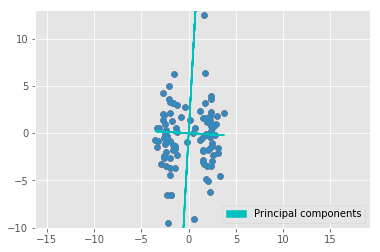

In [116]:
C = np.array([[0.5,0],[0,10]])
mu1 = np.array([-2,0])
mu2 = np.array([2,0])

data = np.vstack([np.random.multivariate_normal(mu1, C, size=50),
                  np.random.multivariate_normal(mu2, C, size=50)])
plt.scatter(data[:,0], data[:,1])
# обучим модель pca и построим главные компоненты
model = PCA(n_components=2)
model.fit(data)
plot_principal_components(data, model)
plt.draw()